# Keras 

Keras se utiliza para hacer redes neuronales

In [1]:
# Importando librarías
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


## Regresión lineal y=mx+b+ruido

In [2]:
m = 2
b = 3
x = np.linspace(0,50,100)

# vamos a fijar una semilla en 101, un valor aleatorio para asegurarnos de que obtengas los mismos resultados que yo!
np.random.seed(101) 
ruido = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [3]:
y = m*x + b + ruido

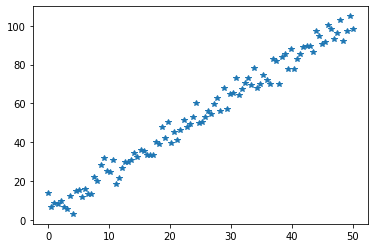

In [4]:
plt.plot(x,y,'*');

## Creando una Red Neuronal para una Regresión

In [5]:
#Importamos las librerias de keras para el modelo neuronal
from keras.models import Sequential
from keras.layers import Dense

In [6]:
#Vamos a hacer un modelo secuancial
model = Sequential()
#Vamos a ir agregando capas al modelo
#Empezamos con una capa densa (todas las neuronas conecatdas)
#Tenemos solo una variable de entrada (x)
#"relu" es la función de activación
# 4 Neuronas, esperamos solo 1 input 
model.add(Dense(4, input_dim=1, activation='relu'))
#Aquí conectamos las neuronas
# 4 Neuronas
model.add(Dense(4, activation='relu'))
#Esta es la capa final, donde vamos a tener el resultado final
#Cambiamos la función de activación por una lineal
# Solo 1 neurona porque solo tenemos 1 output que es Y
model.add(Dense(1, activation='linear'))
# Compilamos todas las capas
#"loss" es la funcuón de error en este caso es el error cuadratico medio
#usamos un optimizador, "adam" es uno de los más utilizados
model.compile(loss='mse', optimizer='adam')

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento de la red

** NOTA: EN ESTE EJEMPLO VAMOS A SALTARNOS EL PASO DE DIVIDIR LOS DATOS EN ENTRENAMIENTO Y PRUEBA!!!! **

In [8]:
#Entrenamos en el modelo con el input y el outpu que tenemos
#Epocs son las pasadas que le damos al problema
#"verbose" es para que nos de información de cada paso
model.fit(x, y, epochs=200, verbose=1)

Epoch 1/200
100/100 [==============================] - 0s 3ms/step - loss: 3628.6337
Epoch 2/200
100/100 [==============================] - 0s 140us/step - loss: 3621.6875
Epoch 3/200
100/100 [==============================] - 0s 101us/step - loss: 3613.8588
Epoch 4/200
100/100 [==============================] - 0s 114us/step - loss: 3605.7270
Epoch 5/200
100/100 [==============================] - 0s 126us/step - loss: 3597.7739
Epoch 6/200
100/100 [==============================] - 0s 102us/step - loss: 3588.7995
Epoch 7/200
100/100 [==============================] - 0s 103us/step - loss: 3579.8632
Epoch 8/200
100/100 [==============================] - 0s 90us/step - loss: 3570.9719
Epoch 9/200
100/100 [==============================] - 0s 144us/step - loss: 3561.7034
Epoch 10/200
100/100 [==============================] - 0s 108us/step - loss: 3551.9250
Epoch 11/200
100/100 [==============================] - 0s 117us/step - loss: 3542.2672
Epoch 12/200
100/100 [======================

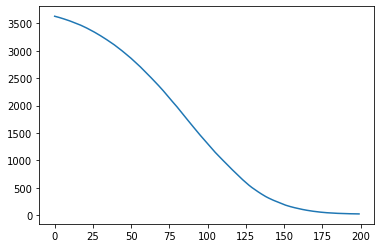

In [9]:
#Hagamos un gráfico de los pasos y que nos muestre el error
#Guardamos el error tomando el modelo que tenemos
loss=model.history.history['loss']
epochs=range(len(loss))
plt.plot(epochs,loss)

## Prediciendo nuevos puntos con el modelo creado


In [10]:
#Generamos valore spara hacer predicciones
x_for_predictions = np.linspace(0,50,1000)

In [11]:
#Vamos a hacer predicciones con el modelo que tenemos
#El modelo de redes neuronales
y_predicted = model.predict(x_for_predictions)

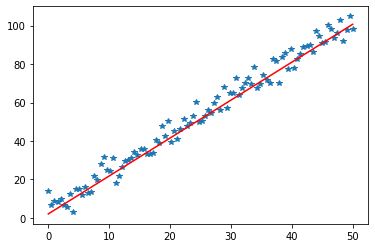

In [12]:
# X e Y originales
plt.plot(x,y,'*')
# Línea de predicción
plt.plot(x_for_predictions,y_predicted,'r');
#Aparentemente es un buen modelo

# Evaluando el error

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [14]:
# Predicciones
prediction_for_true_y = model.predict(x)

In [15]:
mean_squared_error(y,prediction_for_true_y)

22.072936228456868

In [16]:
mean_absolute_error(y,prediction_for_true_y)

3.7755709478279993